This dataset provides a comprehensive analysis of mobile device usage patterns and user behavior classification. It contains samples of user data, including metrics such as app usage time, screen-on time, battery drain, and data consumption. Each entry is categorized into one of five user behavior classes, ranging from light to extreme usage, allowing for insightful analysis and modeling

This dataset is ideal for understanding mobile user behavior and developing predictive models in the realm of mobile technology and applications. This Dataset was **primarily designed to implement machine learning algorithms** and is not a reliable source for a paper or article.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/srikanthgembali/Downloads/user_behavior_dataset.csv')
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None


**Data cleaning** is essential for ensuring the dataset is accurate, consistent, and usable for analysis or modeling. It involves handling missing values, removing duplicates, correcting data types, and dealing with outliers, which helps improve the quality of insights and the performance of machine learning models. Properly cleaned data leads to more reliable results and better model accuracy.

In [4]:
#Checking Missing Values
print(df.isnull().sum())

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


In [3]:
#Removing redundant columns
df.drop(['User ID'],axis =1 ,inplace =True) 

**Visualizations**

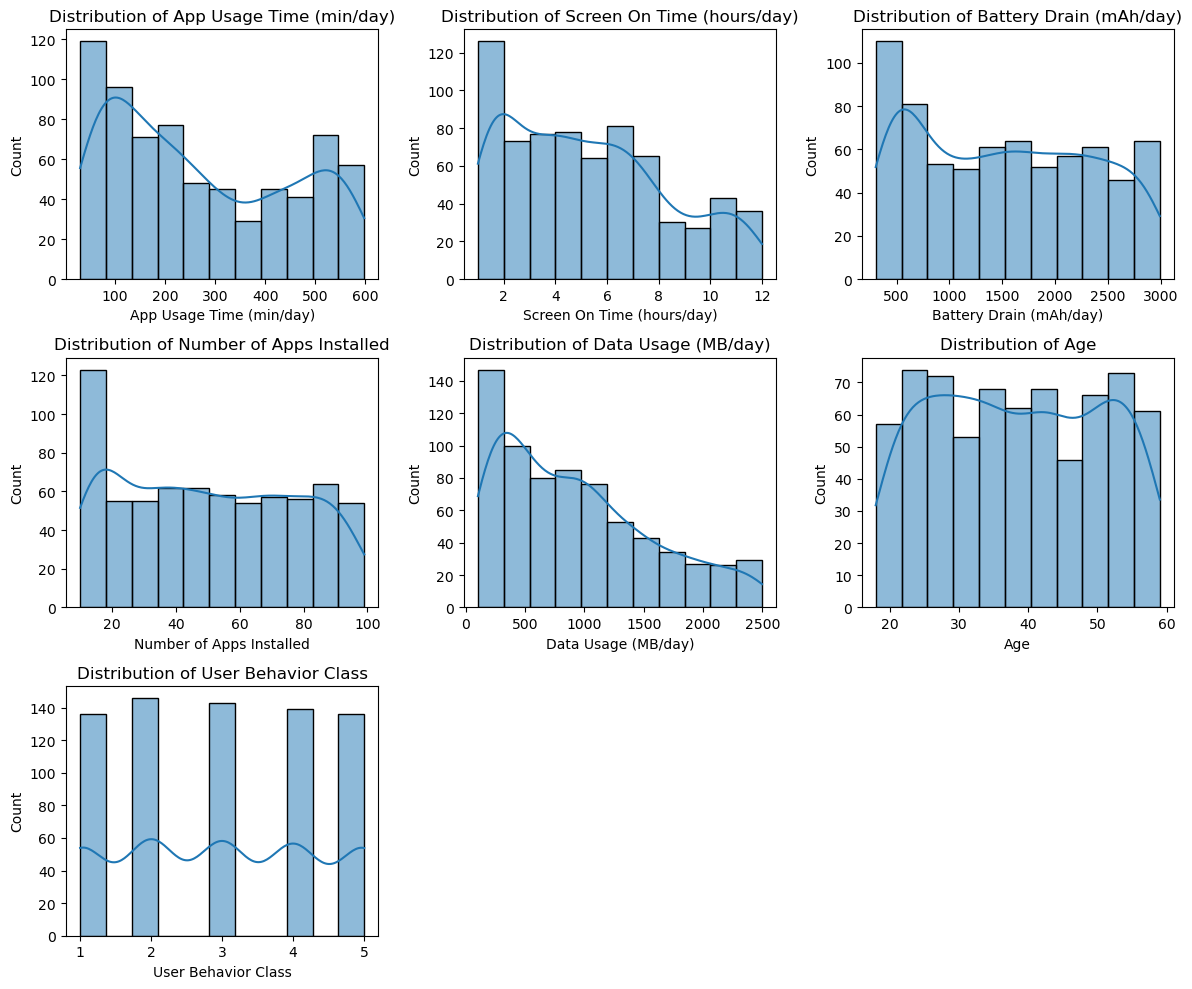

In [13]:
#Distribution of columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

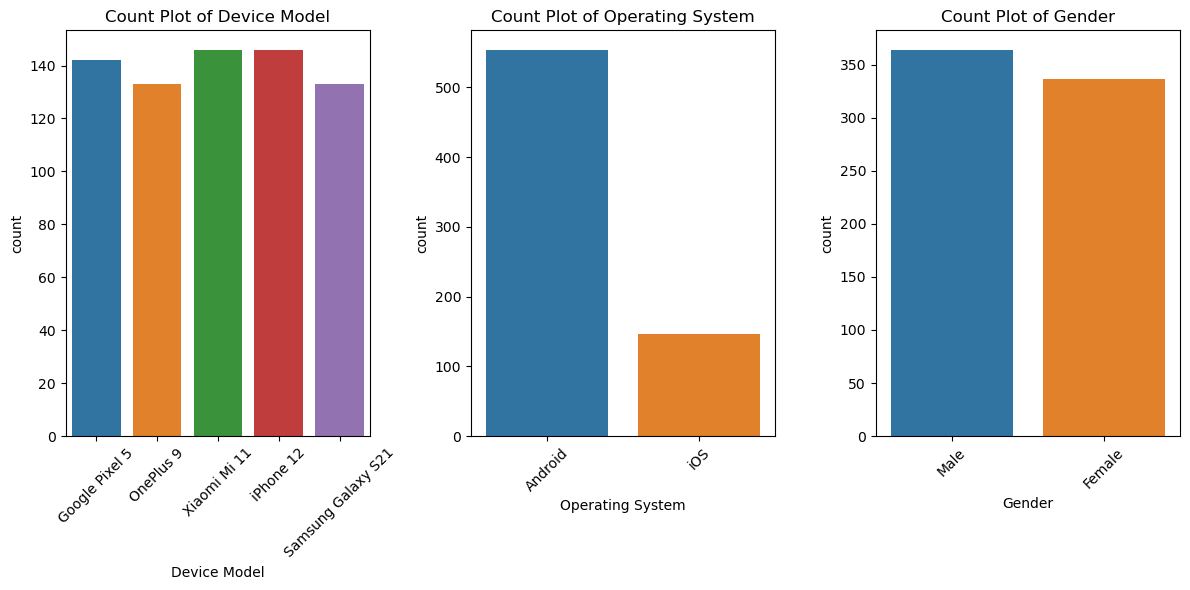

In [16]:
#Count of categorical columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, len(categorical_columns), i)
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

In [4]:
#Transforming categorical columns
from sklearn.preprocessing import LabelEncoder
def transform(df,column):
    le=LabelEncoder()
    df[column] = le.fit_transform(df[column])
    
transform(df,'Device Model')
transform(df,'Operating System')
transform(df,'Gender')

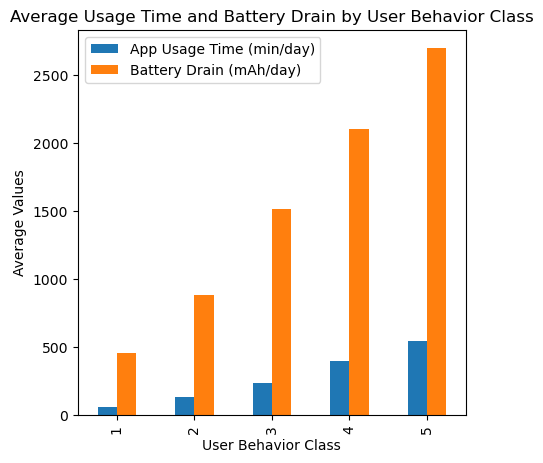

In [7]:
#Other Analysis

avg_data_battery = df.groupby('User Behavior Class')[['App Usage Time (min/day)', 'Battery Drain (mAh/day)']].mean()
avg_data_battery.plot(kind='bar', figsize=(5, 5))
plt.title("Average Usage Time and Battery Drain by User Behavior Class")
plt.ylabel("Average Values")
plt.show()

The graph shows that higher usage time is associated with higher battery consumption and other related factors as well indicating a positive correlation between the features.

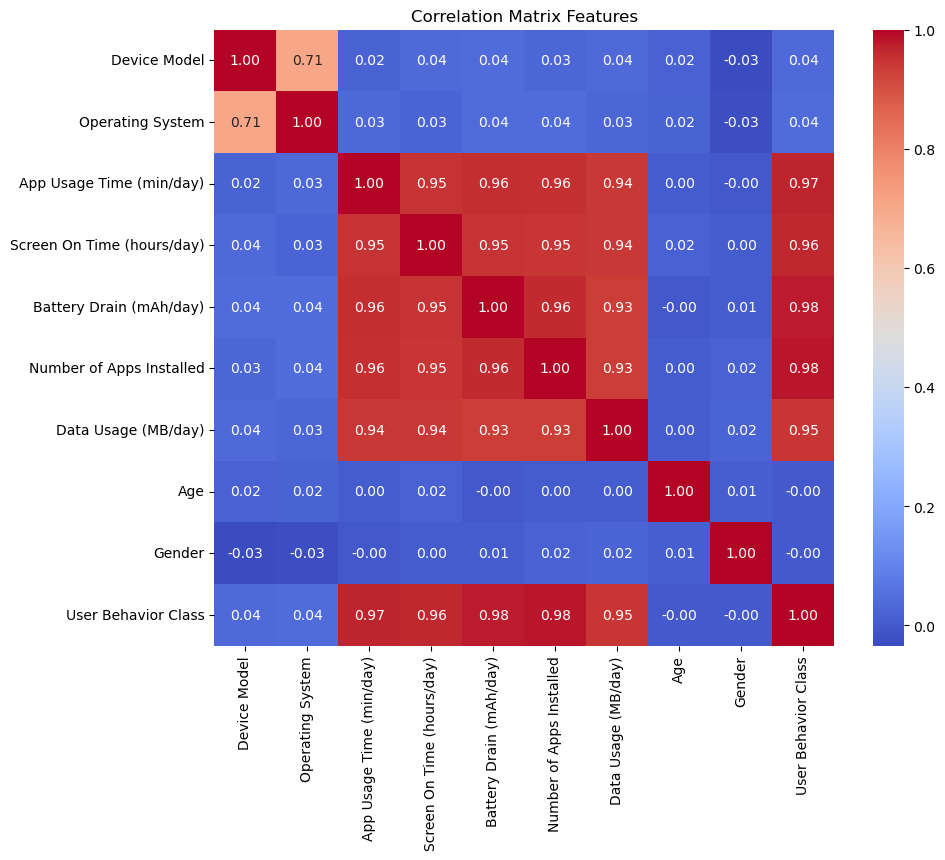

In [6]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Features")
plt.show()

The correlation coefficient ranges from -1 to +1. When it is close to +1, this signifies that there is a strong positive correlation between the target variable and the features. When it is close to -1, it means that there is a strong negative correlation. When it is close to 0, it means that there is no correlation between the features.

In this correlation matrix, we can see which numerical features (e.g., App Usage Time, Screen On Time, Battery Drain) are positively or negatively correlated. For example, Strong correlations indicate a relationship between features like App Usage Time and Battery Drain **(0.96)**, or Data Usage and Number of Apps Installed, which could be useful for understanding user behavior patterns and User Behavior Class.